# Clustering
In this file, instructions how to approach the challenge can be found.

We can use different types of clustering algorithms:

- KMeans
- Hierarchical
- DBScan

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# import data
data = pd.read_csv('/Users/karina/GitHub/NYC_midterm_project/data/main_dataset.csv')
data = data.iloc[:, 2:]
data.head()

,borough,neighborhood,longitude,latitude,population,number_of_restaurants,average_review_count,average_restaurant_rating,average_price_level,yelp_category
0,Bronx,Wakefield,-73.847201,40.894705,21242.0,13,169,4.0,1,caribbean
1,Bronx,Co-op City,-73.829939,40.874294,43752.0,12,771,4.0,2,delis
2,Bronx,Eastchester,-73.827806,40.887556,11506.0,19,532,4.1,1,caribbean
3,Bronx,Fieldston,-73.905643,40.895437,9287.0,9,297,4.4,1,N
4,Bronx,Riverdale,-73.912585,40.890834,9287.0,14,319,4.0,2,burgers


# K-Means Clustering

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [36]:
data_numeric = data.copy()
data_numeric = data_numeric.drop(columns='neighborhood', axis = 1)

onehot = pd.get_dummies(data_numeric[['borough', 'yelp_category']], prefix='', prefix_sep='')
data_numeric = data_numeric.join(onehot)

data_numeric = data_numeric.drop(columns=['borough', 'yelp_category'], axis = 1)
data_numeric.head()

,longitude,latitude,population,number_of_restaurants,average_review_count,average_restaurant_rating,average_price_level,Bronx,Brooklyn,Manhattan,...,pizza,russian,sandwiches,seafood,spanish,steak,sushi,tapasmallplates,thai,tradamerican
0,-73.847201,40.894705,21242.0,13,169,4.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-73.829939,40.874294,43752.0,12,771,4.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-73.827806,40.887556,11506.0,19,532,4.1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-73.905643,40.895437,9287.0,9,297,4.4,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-73.912585,40.890834,9287.0,14,319,4.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

In [46]:
km = KMeans(n_clusters=5,
            n_init=10, 
            random_state=0)

In [47]:
y_km = km.fit_predict(data_scaled)

In [48]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

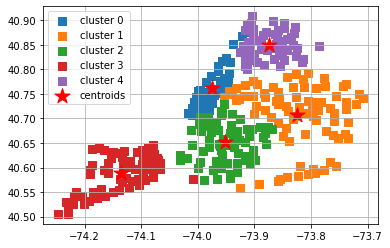

In [49]:
plot_clusters(np.array(data_numeric), y_km, plt_cluster_centers= True)

In [52]:
data_numeric_no_ll = data_numeric.iloc[:, 2:]
data_numeric_no_ll.head()

,population,number_of_restaurants,average_review_count,average_restaurant_rating,average_price_level,Bronx,Brooklyn,Manhattan,Queens,Staten Island,...,pizza,russian,sandwiches,seafood,spanish,steak,sushi,tapasmallplates,thai,tradamerican
0,21242.0,13,169,4.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43752.0,12,771,4.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11506.0,19,532,4.1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9287.0,9,297,4.4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9287.0,14,319,4.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
scaler = StandardScaler()
data_scaled_no_ll = scaler.fit_transform(data_numeric_no_ll)

y_km_no_ll = km.fit_predict(data_scaled_no_ll)

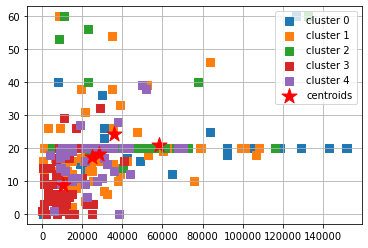

In [56]:
plot_clusters(np.array(data_numeric_no_ll), y_km_no_ll, plt_cluster_centers= True)

## Segmentation of NYC neighborhoods

The goal of this project is to segment the neighborhoods of New York City into separate clusters and examine the information about them. For clustering, We can use any available information **except** demographic and economic indicators. We don't want to segment them based on those and we want to keep them for the **profiling of clusters** to see if there are any important economic differences between the created clusters.

### Feature Engineering

Feature engineering plays a crucial role in this problem. We have limited amount of attributes so we need to create some features that will be important for segmentation.

- Google Places, Yelp and Foursquare APIs: number of venues, density of venues per square mile, number of restaurants, top restarurant category...
- Uber: number of rides per day in the neighborhood
- Meetups: number of events
- etc...

### Feature Selection / Dimensionality Reduction¶
We need to apply different selection techniques to find out which one will be the best for our problems.

Original Features vs. PCA conponents?

Don't forget to scale the features for KMeans.

### Modeling

Use different attributes and clustering techniques and compare the created clusters:

- clustering only on restaurant features
- clustering only on Uber features
- clustering only on location
- combination of all

**Questions:**
1. Which clustering is the best?
2. How are neighborhoods split when we select only 2 clusters?
3. Are there any differences in housing and rental costs in different clusters?

### Evaluation

1. Check the segmentation evaluation metrics:
    - inertia
    - silhoutte score
2. How did you come up with the correct number of clusters?
3. Is there any relationship between the clusters and economic indicators? If yes, what does it mean?

You are required to share the file containing all NYC neighborhoods together with cluster_id with LighthouseLabs.